# Reference Population: Neutral *vs* Selection

Comparison of reference population in case of Neutral evolution and in case of Selection. Simualtions for both populations are run with the same parameters except the **selection factor** which will be $0$ for the Neutral population and $0.3$ for the Selection population.

The parameters are summarized in the table below:

Parameter  | Neutral | Selection  |
-----------|---------|------------|
Final size | $10^6$  |   $10^6$   |
q (start)  |$10^{-3}$| $10^{-3}$  |
q-factor   | $1$   |   $1$    |  
P(death)   | $0.3$   |   $0.3$    |
Selection  | **0**   |  **0.3**   |  

In [1]:
from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *
from ThesisScripts.Visualizations import *
from ThesisScripts.PhyloTree import *

from IPython.display import Image

%matplotlib inline
#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

# Reference simulations

## Neutral

In [2]:
# set seed to get same result for each test simulation
np.random.seed(123)

# Test cell
l = 10**6
q = 10**(-3)
qfac = 1
alpha = 0.3
sel = 0
ref = Population(l, q, mutfactor=qfac, death_frac=alpha, selection=sel)
ref.simulate()
print("Total population size:", ref.size)
print("Generations:", ref.gen)
print()
print("Start clone size:", ref.start_clone.size)
print("Number of subclones:", len(ref.clones[1:]))

Total population size: 1668674
Generations: 27

Start clone size: 1655654
Number of subclones: 2375


## In case of selection

In [3]:
# set seed to get same result for each test simulation
np.random.seed(123)

# Test cell
l = 10**6
q = 10**(-3)
qfac = 1
alpha = 0.3
sel = 0.3
refSel = Population(l, q, mutfactor=qfac, death_frac=alpha, selection=sel)
refSel.simulate()
print("Total population size:", refSel.size)
print("Generations:", refSel.gen)
print()
print("Start clone size:", refSel.start_clone.size)
print("Number of subclones:", len(refSel.clones[1:]))

Total population size: 1668674
Generations: 27

Start clone size: 652519
Number of subclones: 2449


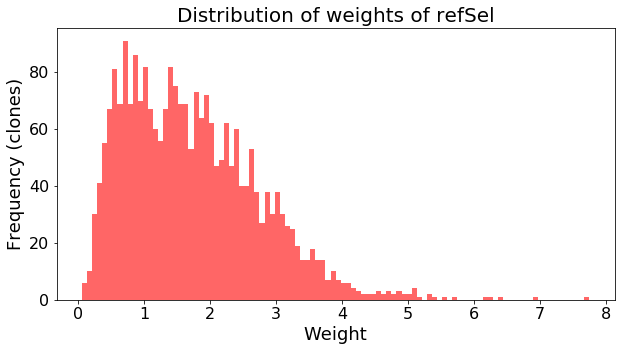

In [4]:
# Check weights of clones for population with selection
weights = []
for clone in refSel.clones:
    weights.append(clone.weight)

plt.figure(figsize=(10,5))
plt.hist(weights, bins=100, color='r', alpha=0.6)
plt.title("Distribution of weights of refSel")
plt.xlabel("Weight")
plt.ylabel("Frequency (clones)")
plt.show()

#### Final data for the two populations

In [5]:
ref_data = final_data(ref)
refSel_data = final_data(refSel)

**ALL ANALYSES** are carried out with the detection limit defined below, unless otherwise stated.

In [6]:
detection_limit = 100

## Evolution of clone family sizes for Reference Population

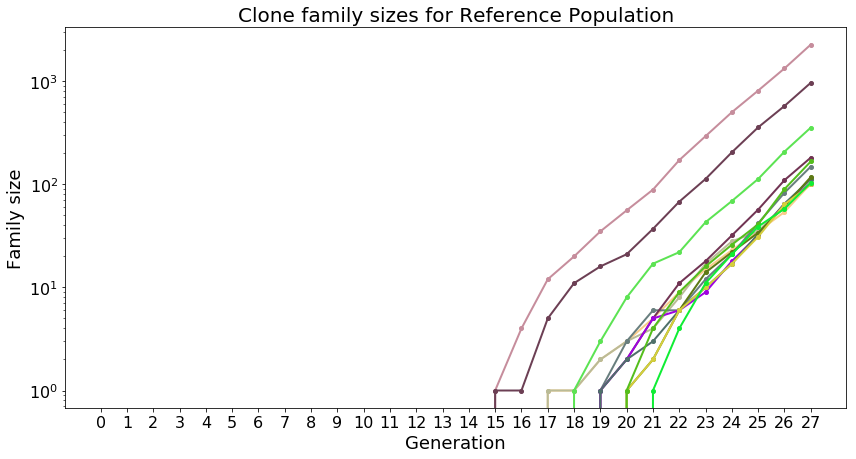

In [7]:
ref_fam_size_plot = family_size_plots(ref, det_lim=detection_limit)
plt.title("Clone family sizes for Reference Population")
#plt.legend()
plt.savefig("./Figures/Ref-Neutral_vs_Selection/Ref-fam_size_evo.png")
plt.show()

## Evolution of clone family sizes for Reference Population with Selection

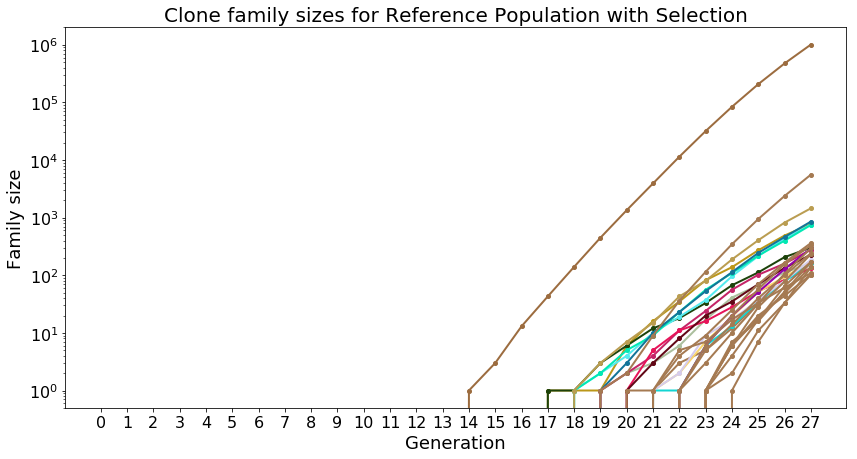

In [8]:
refSel_fam_size_plot = family_size_plots(refSel, det_lim=detection_limit)
plt.title("Clone family sizes for Reference Population with Selection")
#plt.legend()
plt.savefig("./Figures/Ref-Neutral_vs_Selection/Sel-fam_size_evo.png")
plt.show()

## Phylo tree for Reference Population

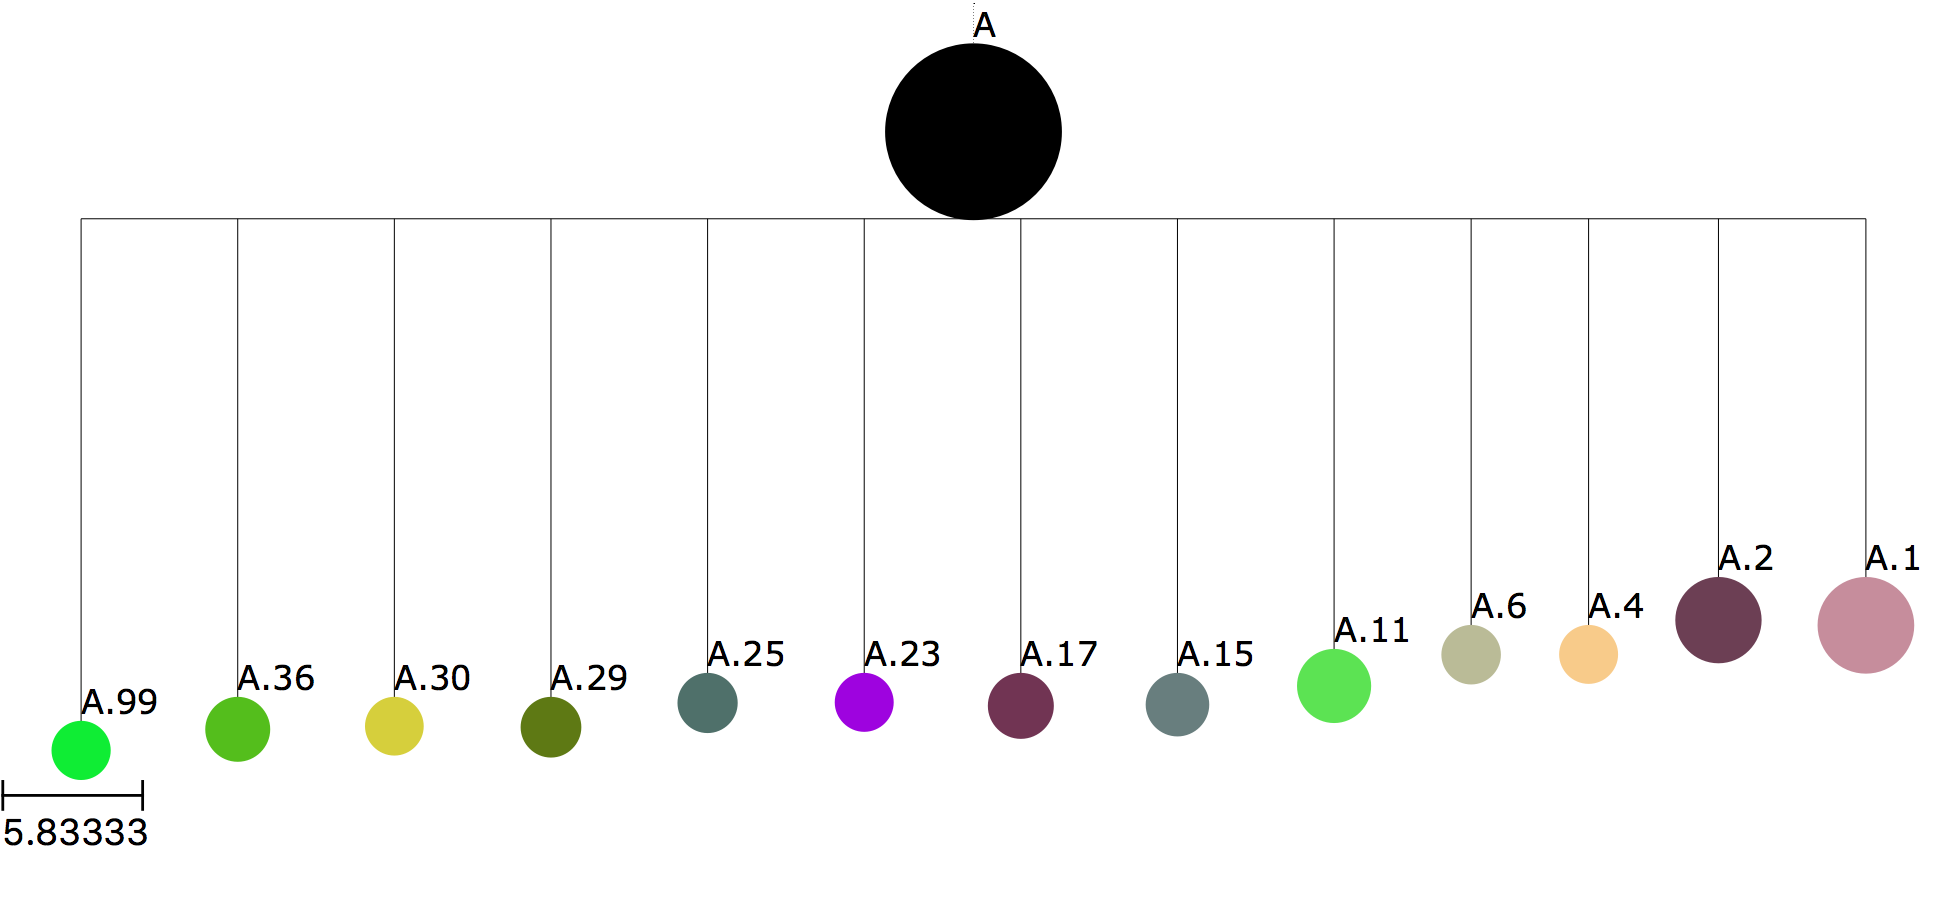

In [9]:
ref_tree, ref_ts = build_tree(ref, det_lim=detection_limit, log=True)
#print(ref_tree)
ref_tree.render("./Figures/Ref-Neutral_vs_Selection/Ref-tree.png", tree_style=ref_ts, h=260, units='mm');
Image("./Figures/Ref-Neutral_vs_Selection/Ref-tree.png")

## Phylo tree for Reference Population with Selection

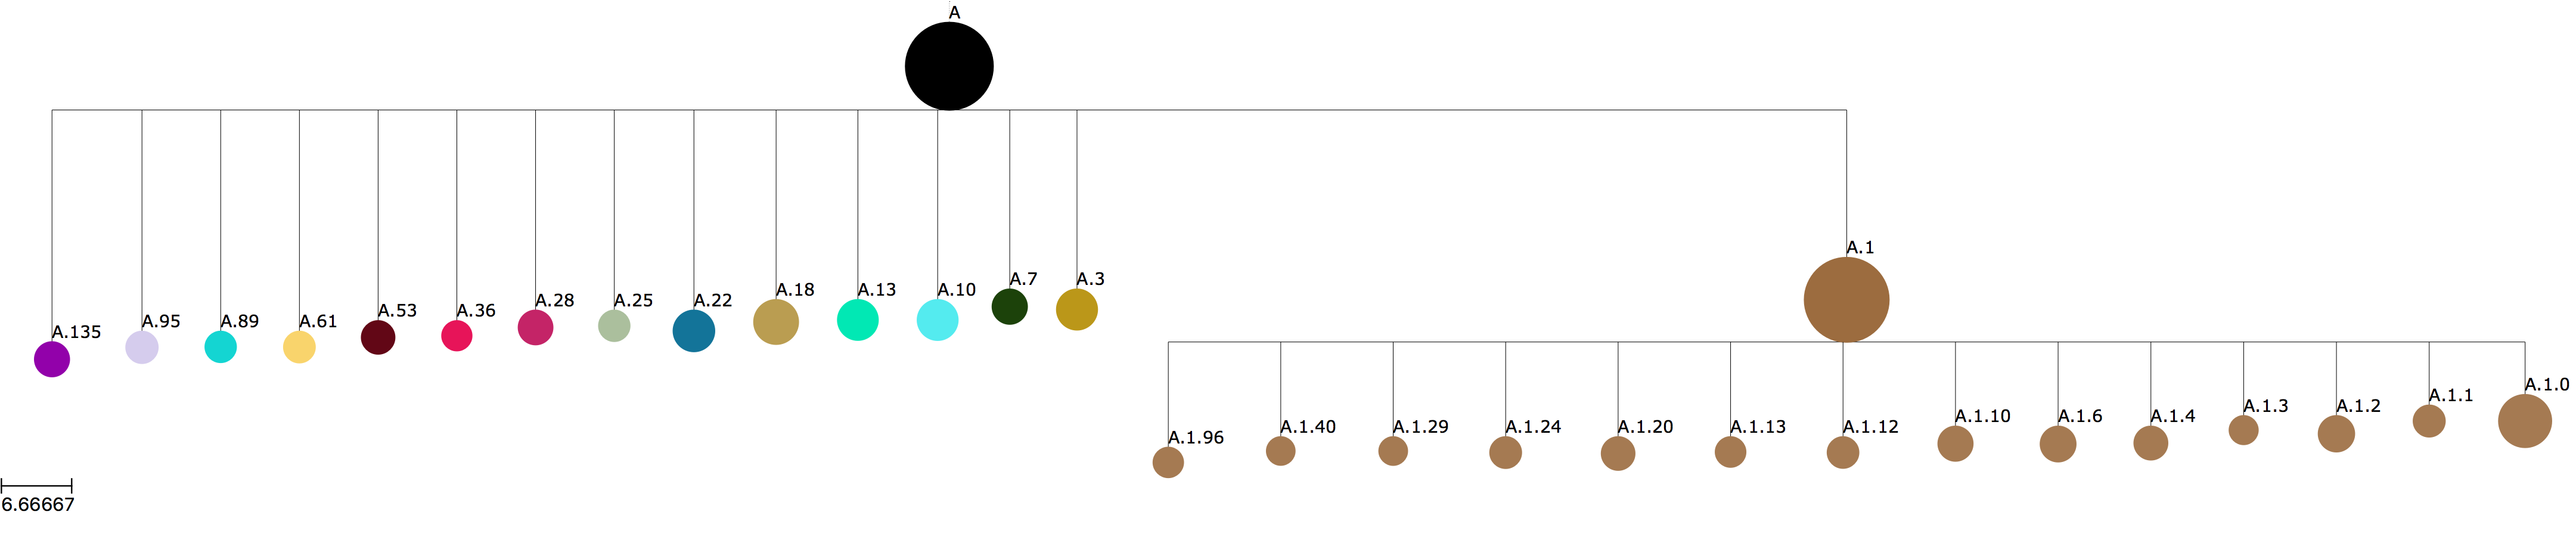

In [10]:
refSel_tree, refSel_ts = build_tree(refSel, det_lim=detection_limit, log=True)
#print(refSel_tree)
refSel_tree.render("./Figures/Ref-Neutral_vs_Selection/Sel-tree.png", tree_style=refSel_ts, h=260, units='mm');
Image("./Figures/Ref-Neutral_vs_Selection/Sel-tree.png")

## Allele frequency spectrum for Reference Population

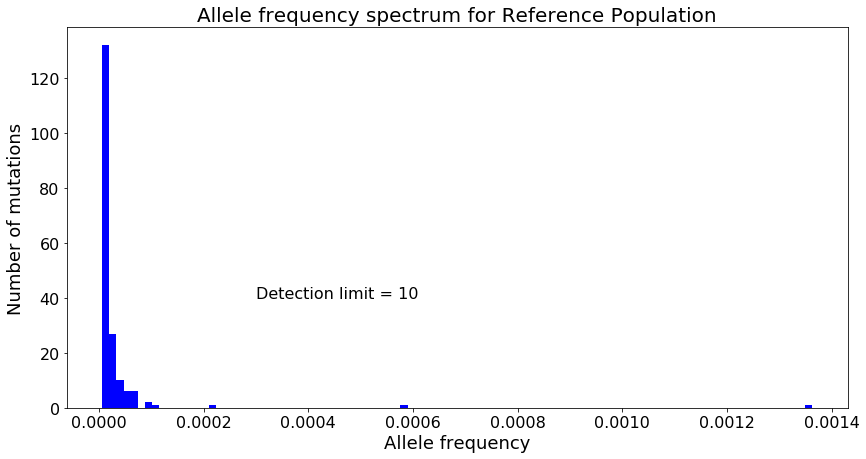

In [11]:
lim = 10
ref_af = allele_freq_spectrum(ref, det_lim=lim)
ref_af.iloc[1:].plot(kind='hist', grid=False, logy=False, bins=100, color='b')
plt.ylabel('Number of mutations')
plt.xlabel('Allele frequency')
plt.title('Allele frequency spectrum for Reference Population')
plt.text(0.0003, 40, "Detection limit = %s" %(lim))
plt.savefig("./Figures/Ref-Neutral_vs_Selection/Ref-AF_spec.png")
plt.show()

## Allele frequency spectrum for Reference Population with Selection

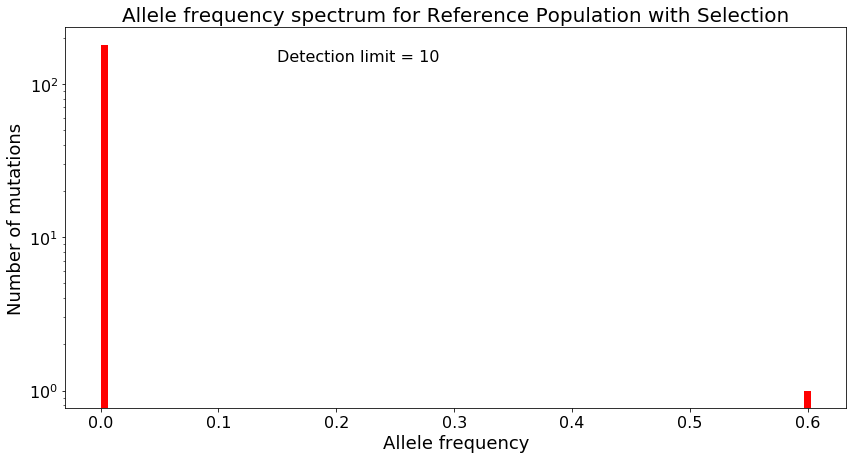

In [12]:
lim = 10
refSel_af = allele_freq_spectrum(refSel, det_lim=lim)
refSel_af.iloc[1:].plot(kind='hist', grid=False, logy=True, bins=100, color='r')
plt.ylabel('Number of mutations')
plt.xlabel('Allele frequency')
plt.title('Allele frequency spectrum for Reference Population with Selection')
plt.text(0.15, 140, "Detection limit = %s" %(lim))
plt.savefig("./Figures/Ref-Neutral_vs_Selection/Sel-AF_spec.png")
plt.show()

## Cumulative number of mutations in function of 1/f 


R^2 = 0.999071682051


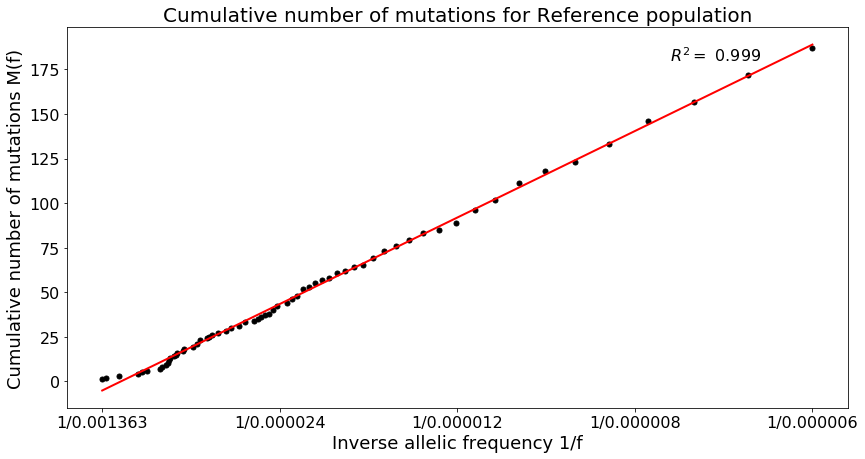


R^2 = 0.983287547368


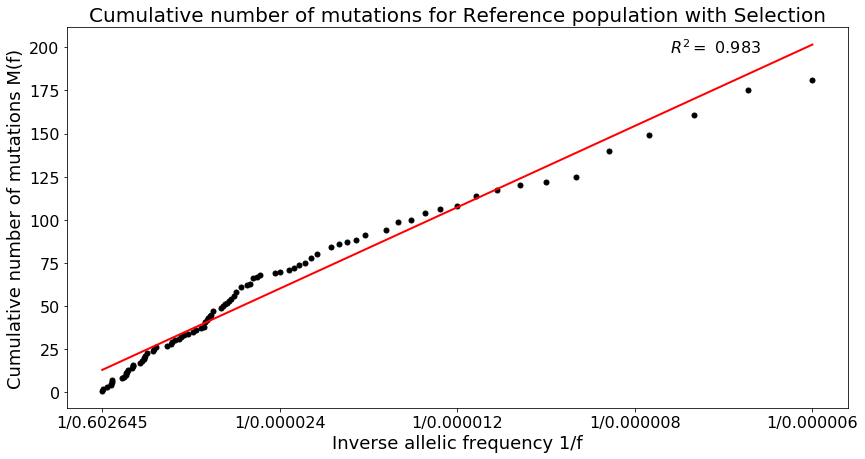

In [13]:
fit_ref_af_raw, fit_ref_af_r_value, fit_ref_fig = fit_cumulative_mutations(ref_af)
print("\nR^2 =", fit_ref_af_r_value)
plt.title("Cumulative number of mutations for Reference population");
plt.savefig("./Figures/Ref-Neutral_vs_Selection/Ref-Cum_num_M.png");
plt.show()

fit_refSel_af_raw, fit_refSel_af_r_value, fit_refSel_fig = fit_cumulative_mutations(refSel_af)
print("\nR^2 =", fit_refSel_af_r_value)
plt.title("Cumulative number of mutations for Reference population with Selection");
plt.savefig("./Figures/Ref-Neutral_vs_Selection/Sel-Cum_num_M.png");
plt.show()

## Heterogeneity

In [9]:
ref_h = heterogeneity(ref_data, det_lim=1)
refSel_h = heterogeneity(refSel_data, det_lim=1)
print(ref_h, refSel_h)

0.961198781976 0.0443708885886


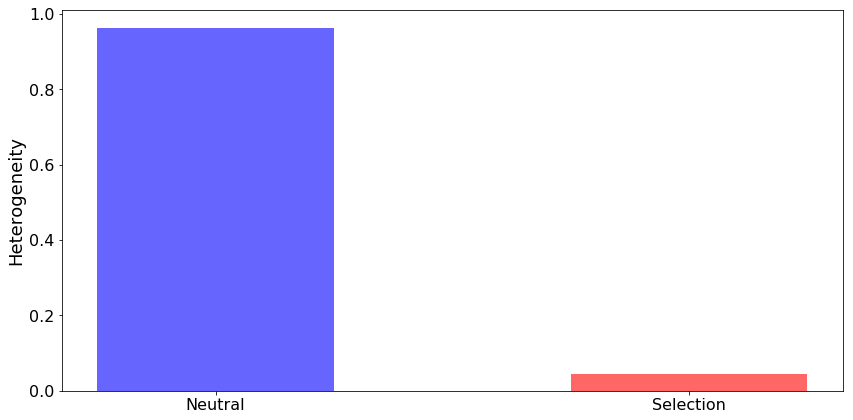

In [10]:
labels=["Neutral", "Selection"]
plt.bar(left=[0, 1], height=[ref_h, refSel_h], width=0.5, color=['b', 'r'],
        alpha=0.6, tick_label=labels);
plt.ylabel('Heterogeneity');
plt.show();

## Distribution of number of mutations for Reference Population

             Neutral evolution  Selection = 0.3
# mutations                                    
1                       4834.0           999807
2                          NaN             8096


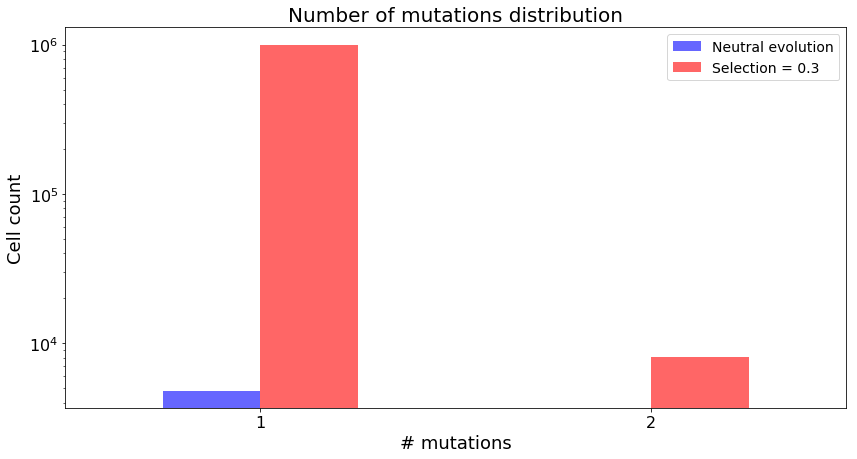

In [16]:
ref_num_mut_df = num_mutations_distribution(ref_data, det_lim=detection_limit)
ref_num_mut_df.columns = ["Neutral evolution"]
#ref_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='b', alpha=0.6);

refSel_num_mut_df = num_mutations_distribution(refSel_data, det_lim=detection_limit)
refSel_num_mut_df.columns = ["Selection = %s" %(sel)]
#refSel_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='r', alpha=0.6);

combo = ref_num_mut_df.join(refSel_num_mut_df, how='outer')
print(combo)
combo.plot(kind='bar', logy=True, legend=True, rot=0, color=['b', 'r'], alpha=0.6)

plt.ylabel("Cell count")
plt.title("Number of mutations distribution")
plt.savefig("./Figures/Ref-Neutral_vs_Selection/Neutral_vs_Sel-Num_mut.png")

## Average number of mutations per clone

In [18]:
ref_avg_num_mut = avg_num_mutations(ref_num_mut_df)
refSel_num_mut = avg_num_mutations(refSel_num_mut_df)

In [19]:
print(ref_avg_num_mut)
print(refSel_num_mut)

1.0
1.008032519


## Reconstructing the mutational timeline

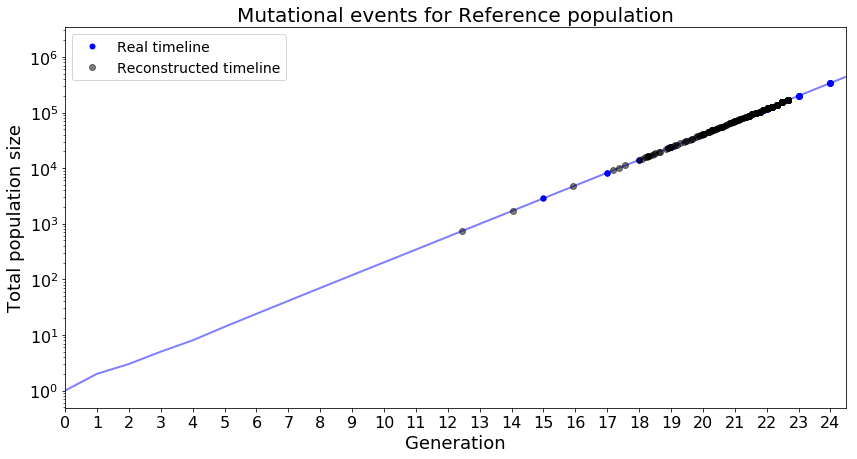

In [19]:
ref_mutations = ref_data.iloc[1:].loc[ref_data['Family size'] >= 10]
ref_real_t = ref.gen - ref_mutations['Age'].values
ref_real_popsizes = list(ref.size_vec[i] for i in ref_real_t)

ref_rec_t, ref_rec_popsizes, err = reconstruct_mutational_timeline(ref, det_lim = 10)

plt.plot(ref.size_vec, color='b', alpha=0.5);
plt.plot(ref_real_t, ref_real_popsizes, marker='o', markersize=5, color='b', 
         linestyle='none', label='Real timeline');
plt.plot(ref_rec_t, ref_rec_popsizes, marker='o', markersize=6, color='k', alpha=0.5,
         linestyle='none', label='Reconstructed timeline');
plt.xlabel('Generation');
plt.ylabel('Total population size');
plt.legend();
plt.title('Mutational events for Reference population');
plt.xticks(range(0,26,1));
plt.xlim(0, 24.5);
plt.yscale('log');
plt.savefig("./Figures/Ref-Neutral_vs_Selection/Ref-Rec_mut_timeline.png");
plt.show()

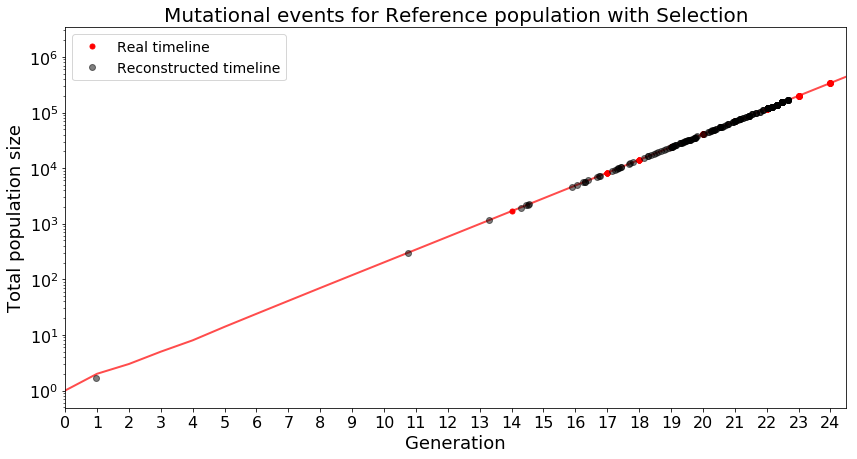

In [20]:
refSel_mutations = refSel_data.iloc[1:].loc[refSel_data['Family size'] >= 10]
refSel_real_t = refSel.gen - refSel_mutations['Age'].values
refSel_real_popsizes = list(refSel.size_vec[i] for i in refSel_real_t)

refSel_rec_t, refSel_rec_popsizes, err = reconstruct_mutational_timeline(refSel, det_lim = 10)

plt.plot(refSel.size_vec, color='r', alpha=0.7);
plt.plot(refSel_real_t, refSel_real_popsizes, marker='o', markersize=5, color='r', 
         linestyle='none', label='Real timeline');
plt.plot(refSel_rec_t, refSel_rec_popsizes, marker='o', markersize=6, color='k', alpha=0.5,
         linestyle='none', label='Reconstructed timeline');
plt.xlabel('Generation');
plt.ylabel('Total population size');
plt.legend();
plt.title('Mutational events for Reference population with Selection');
plt.xticks(range(0,26,1));
plt.xlim(0, 24.5);
#plt.ylim(-10000, 400000);
plt.yscale('log');
plt.savefig("./Figures/Ref-Neutral_vs_Selection/Sel-Rec_mut_timeline.png");
plt.show()

In the case of **Selection** it seems that some mutations are predicted to have occurred much earlier than in reality (cfr. mutational events predicted around generations 3-4). These mutations likely correspond to the clones  with high selective advantage that have come to dominate the population. Because they grow faster than expected under the Neutral model, resulting in a higher than expected allele frequency, reconstructing the total population size at which the mutation occurred results in a smaller value and thus an earlier event.